In [31]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
amazon_review = pd.read_csv('/Users/justinsmith/Documents/GitHub/amazon_reviews.txt', delimiter= '\t', header=None)
amazon_review.columns = ['text', 'attitude']

In [33]:
amazon_review[amazon_review['attitude'] == 0]

,text,attitude
0,So there is no way for me to plug it in here i...,0
3,Tied to charger for conversations lasting more...,0
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0
12,If the two were seperated by a mere 5+ ft I st...,0
14,"The design is very odd, as the ear ""clip"" is n...",0
16,I advise EVERYONE DO NOT BE FOOLED!,0
19,It clicks into place in a way that makes you w...,0


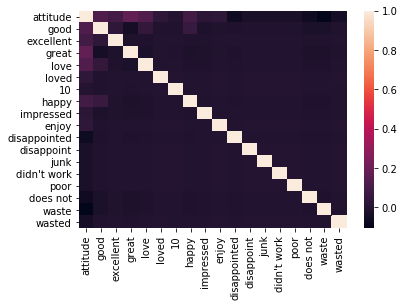

In [34]:
positive_words = ['good', 'excellent', 'great', 'love', 'loved', '10', 'happy', 'impressed', 'enjoy']
negative_words = ['disappointed', 'disappoint', 'junk', "didn't work", 'poor', 'does not','waste', 'wasted']

for key in positive_words:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    amazon_review[str(key)] = amazon_review.text.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    
for key in negative_words:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    amazon_review[str(key)] = amazon_review.text.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    
sns.heatmap(amazon_review.corr())

In [41]:
from sklearn.naive_bayes import BernoulliNB
data = amazon_review[positive_words]
target = amazon_review['attitude']

In [36]:
bnb = BernoulliNB()

In [42]:
bnb.fit(data, target)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [43]:
y_pred = bnb.predict(data)

In [46]:
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 410


In [47]:
data_2 = amazon_review[negative_words]

bnb.fit(data_2, target)
y_pred = bnb.predict(data_2)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 472


In [52]:
imdb = pd.read_csv('/Users/justinsmith/Documents/GitHub/imdb_reviews.txt', delimiter='\t')
imdb.columns = ['text', 'attitude']
yelp = pd.read_csv('/Users/justinsmith/Documents/GitHub/yelp_reviews.txt', delimiter='\t')
yelp.columns = ['text', 'attitude']

In [54]:
for key in positive_words:
    imdb[str(key)] = imdb.text.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    
for key in negative_words:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    imdb[str(key)] = imdb.text.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

for key in positive_words:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    yelp[str(key)] = yelp.text.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    
for key in negative_words:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    yelp[str(key)] = yelp.text.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    

In [55]:
imbd_data=imdb[positive_words]
imdb_data_n = imdb[negative_words]
target_i = imdb['attitude']
yelp_data = yelp[positive_words]
yelp_data_n = yelp[negative_words]
target_y = yelp['attitude']

In [57]:
bnb.fit(imbd_data, target_i)
y_pred = bnb.predict(imbd_data)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target_i != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 330


In [59]:
bnb.fit(imdb_data_n, target_i)
y_pred = bnb.predict(imdb_data_n)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target_i != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 340


In [60]:
bnb.fit(yelp_data, target_y)
y_pred = bnb.predict(yelp_data)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target_y != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 402


In [61]:
bnb.fit(yelp_data_n, target_y)
y_pred = bnb.predict(yelp_data_n)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target_y != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 481
